# Wykresy - Zadania

## Zadanie 2.1

Stwórz wykresy funkcji $f(x) = \frac{e^x}{e^x + 1}$ oraz $f(x)=\tanh(x)$ w przedziale $[-10, 10]$. Wykresy umieść na jednym obiekcie *matplotlib*, dodaj podpisy osi i legendę, wykorzystaj różne style i kolory.

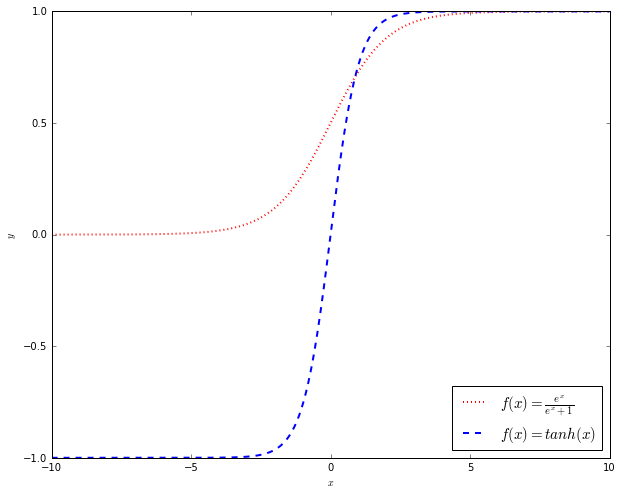

In [22]:
%matplotlib inline

# tutaj wpisz rozwiązanie zadania 2.1

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

x = np.linspace(-10.0, 10.0, 1000)
y = np.exp(x) / (np.exp(x) + 1)
line = ax.plot(x, y, color='red', label=r'$f(x)=\frac{e^x}{e^x+1}$', linestyle=":", lw=2)

z = np.tanh(x)
line = ax.plot(x, z, color='blue', label=r'$f(x)=tanh(x)$', linestyle="--", lw=2)

legend = ax.legend(loc='lower right', prop={'size':15})

## Zadanie 2.2

Stwórz trójwymiarowy wykres funkcji $f(x,y) = -(x^2 + y^3)$ podobny do poniższego: 
<img src="plot3d.png">

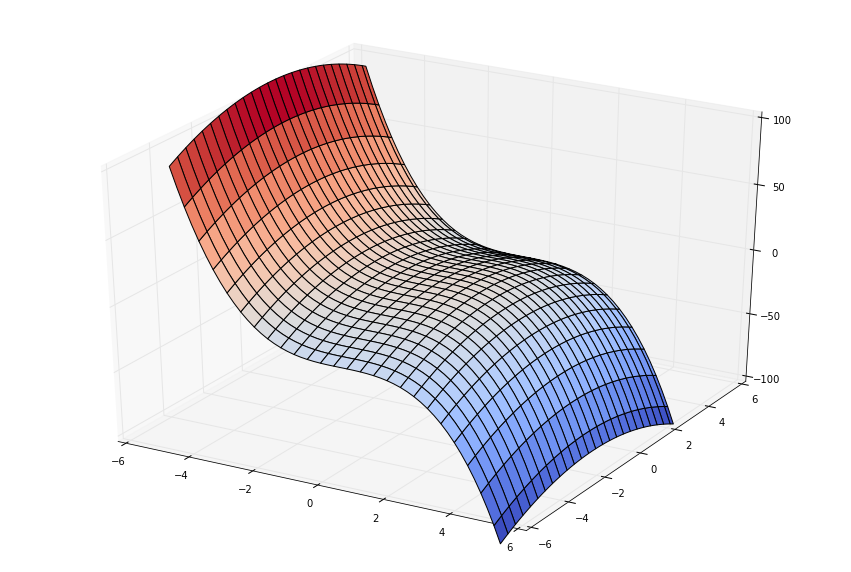

In [128]:
%matplotlib inline

# tutaj wpisz rozwiązanie zadania 2.2

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
Z = -(X**2 + Y**3)

surf = ax.plot_surface(Y, X, Z, rstride=2, cstride=2, cmap=cm.coolwarm,
        linewidth=1, antialiased=True)

ax.set_zlim(-100.01, 100.01)

plt.show()

## Zadanie 2.3

Moduł `numpy.random` zawiera wiele różnych rozkładów prawdopodobieństwa (http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions). Wybierz cztery dowolne rozkłady inne niż rozkład normalny i przedstaw ich histogramy na jednym obiekcie `matplotlib`. Histogramy powinny być umieszczone na siatce 2x2. Liczba przedziałów to 100. Dla każdego histogramu wybierz różne style, dodaj legendę.

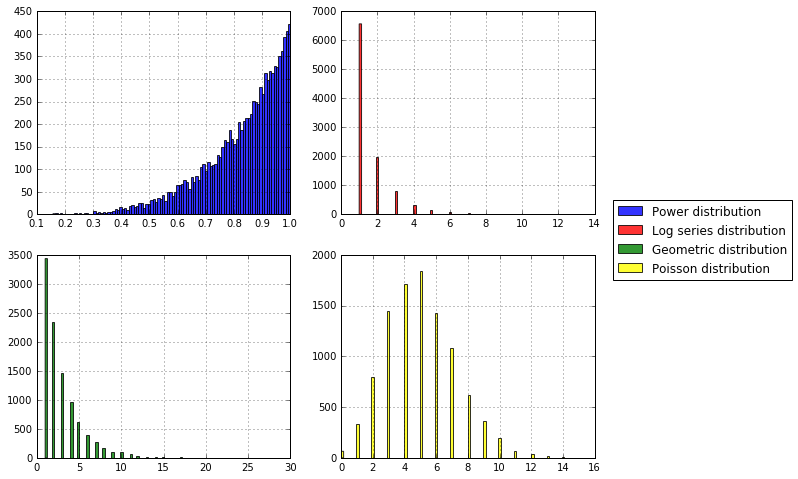

In [333]:
%matplotlib inline

# tutaj wpisz rozwiązanie zadania 2.3

import matplotlib.pyplot as plt
import numpy as np

n = 10000
num_bins = 100
fig = plt.figure(figsize=(10, 8))

ax0 = fig.add_subplot(221)
ax0.grid(True)
x = np.random.power(5, n) 
ax0.hist(x, num_bins, color='blue', label='Power distribution', alpha=0.8)
ax0_hist, ax0_label = ax0.get_legend_handles_labels()

ax1 = fig.add_subplot(222)
ax1.grid(True)
x = np.random.logseries(0.6, n)
ax1.hist(x, num_bins, color='red', label='Log series distribution', alpha=0.8)
ax1_hist, ax1_label = ax1.get_legend_handles_labels()

ax2 = fig.add_subplot(223)
ax2.grid(True)
x = np.random.geometric(0.35, n)
ax2.hist(x, num_bins, color='green', label='Geometric distribution', alpha=0.8)
ax2_hist, ax2_label = ax2.get_legend_handles_labels()

ax3 = fig.add_subplot(224)
ax3.grid(True)
x = np.random.poisson(5, n)
ax3.hist(x, num_bins, color='yellow', label='Poisson distribution', alpha=0.8)
ax3_hist, ax3_label = ax3.get_legend_handles_labels()

plt.legend(ax0_hist + ax1_hist + ax2_hist + ax3_hist, 
           ax0_label + ax1_label + ax2_label + ax3_label,
           bbox_to_anchor=(1.8, 1.3))
plt.show()

## Zadanie 2.4

W pliku `wine.data` znajduje się zbiór danych, który zawiera pomiary 13 właściwości (cech) charakteryzujących trzy różne gatunki wina. Stwórz dwa wykresy:

1. Wykres dwuwymiarowy przedstawiający zależność dwóch wybranych przez Ciebie właściwości. 
2. Wykres trójwymiarowy, który dodatkowo będzie zawierał trzecią cechę. 

Punkty należące do różnych grup oznacz różnymi kolorami. Dodaj opisy osi oraz legendy. Wykorzystaj poniższy fragment kodu za punkt wyjścia.

Pierwsza kolumna w pliku `wine.data` to klasa (wartość liczbowa 1, 2 lub 3) następnie znajduje się 13 cech. Wszystkie wartości oddzielone są przecinkiem. Szczegółowy opis kolumn znajduje się w pliku `wine.names`.

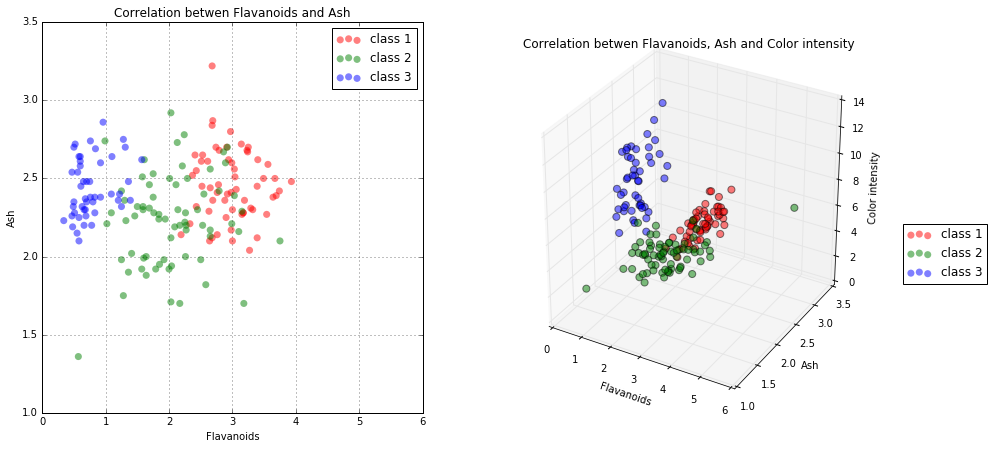

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from random import sample
from collections import defaultdict
import csv
import re

names = []
with open('wine.names', mode='r') as f:
    for line in f:
        match = re.search(r'\t\d+\)\s?(.*)', line)
        if match:
            names.append(match.group(1).strip())
           
reader = csv.reader(open('wine.data'), delimiter=',')
labels = []
features = []
for fields in reader:
    features.append(fields[1:])
    labels.append(fields[0])

i, j, k = sample(range(len(names)), 3) # because I can't decide which features I should use :D

colors = {1: 'red', 2: 'green', 3: 'blue', 4: 'cyan'}
classes = [defaultdict(list) for _ in range(len(set(labels)))]
for elem in zip(labels, features):
    idx = int(elem[0]) - 1
    classes[idx]['name'] = 'class %s' % elem[0]
    classes[idx]['color'] = colors[int(elem[0])]
    classes[idx]['features'].append(elem[1])
    
fig = plt.figure(figsize=(15, 7))
props = dict(alpha=0.5, edgecolors='none')

# 2D
ax0 = fig.add_subplot(121)
ax0.grid(True)
ax0.set_xlabel(names[i])
ax0.set_ylabel(names[j])

ax0_handles = []
for class_ in classes:
    x = [feature[i] for feature in class_['features']]
    y = [feature[j] for feature in class_['features']]
    ax0_handles.append(ax0.scatter(x, y, c=class_['color'], s=50, **props))

ax0.set_title('Correlation betwen %s and %s' % (names[i], names[j]))
ax0.legend(ax0_handles, [item['name'] for item in classes])

# 3D
ax1 = fig.add_subplot(122, projection='3d')
ax1.grid(True)
ax1.set_xlabel(names[i])
ax1.set_ylabel(names[j])
ax1.set_zlabel(names[k])

ax1_handles = []
for class_ in classes:
    x = [float(feature[i]) for feature in class_['features']]
    y = [float(feature[j]) for feature in class_['features']]
    z = [float(feature[k]) for feature in class_['features']]
    ax1_handles.append(ax1.scatter(x, y, z, c=class_['color'], s=50, **props))

ax1.set_title('Correlation betwen %s, %s and %s' % (names[i], names[j], names[k]))
ax1.legend(ax1_handles, [item['name'] for item in classes], bbox_to_anchor=(1.3, 0.5))

plt.show()
    